In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

In [2]:
atla_data = pd.read_csv(
    Path("atl_laborforce.csv"), index_col="Month", infer_datetime_format=True, parse_dates=True
)
atla_data.head()

,Series ID,Year,Period,Label,Value
Month,,,,,
2010-01-01,LAUMT131206000000006,2010,M01,2010 Jan,2763339
2010-02-01,LAUMT131206000000006,2010,M02,2010 Feb,2728304
2010-03-01,LAUMT131206000000006,2010,M03,2010 Mar,2720920
2010-04-01,LAUMT131206000000006,2010,M04,2010 Apr,2716360
2010-05-01,LAUMT131206000000006,2010,M05,2010 May,2711392


In [3]:
atla_labor = atla_data[['Value']]

atla_labor.head()

,Value
Month,
2010-01-01,2763339
2010-02-01,2728304
2010-03-01,2720920
2010-04-01,2716360
2010-05-01,2711392


In [4]:
atla_case_shiller = pd.read_csv(
    Path("atla_case_shiller.csv"), index_col="DATE", infer_datetime_format=True, parse_dates=True
)
atla_case_shiller.head()

,ATXRNSA
DATE,
1991-01-01,69.610578
1991-02-01,69.172916
1991-03-01,69.047657
1991-04-01,69.401637
1991-05-01,69.688718


In [5]:
atla_df = pd.merge(atla_labor,atla_case_shiller, left_index = True, right_index = True)

atla_df.columns = ['atla_labor_force','atla_case_shiller']

In [6]:
atla_df.head()

,atla_labor_force,atla_case_shiller
2010-01-01,2763339,107.04154
2010-02-01,2728304,105.65453
2010-03-01,2720920,103.73149
2010-04-01,2716360,105.68928
2010-05-01,2711392,107.86100


In [7]:
atla_unemployment = pd.read_csv(
    Path("atlanta_unemployment.csv"), index_col="Month", infer_datetime_format=True, parse_dates=True
)
atla_unemployment.head()

,Series ID,Year,Period,Label,Value
Month,,,,,
2010-01-01,LAUMT131206000000004,2010,M01,2010 Jan,300930
2010-02-01,LAUMT131206000000004,2010,M02,2010 Feb,293432
2010-03-01,LAUMT131206000000004,2010,M03,2010 Mar,283792
2010-04-01,LAUMT131206000000004,2010,M04,2010 Apr,271498
2010-05-01,LAUMT131206000000004,2010,M05,2010 May,272999


In [8]:
atla_unemployment = atla_unemployment[["Value"]] 

In [9]:
atla_unemployment.columns = ["atla_unemployment"]

In [10]:
atla_df = pd.merge(atla_df, atla_unemployment, left_index = True, right_index = True)

In [11]:
atla_df.head()

,atla_labor_force,atla_case_shiller,atla_unemployment
2010-01-01,2763339,107.04154,300930
2010-02-01,2728304,105.65453,293432
2010-03-01,2720920,103.73149,283792
2010-04-01,2716360,105.68928,271498
2010-05-01,2711392,107.86100,272999


In [12]:
atla_df['atla_labor_force_pct'] = atla_df['atla_labor_force'].pct_change()

In [13]:
atla_df['atla_case_shiller_pct'] = atla_df['atla_case_shiller'].pct_change()

In [15]:
#bring in data sets from team

In [14]:
hr_wage_atla = pd.read_csv(
    Path("hr_wage_atl.csv"), index_col="DATE", infer_datetime_format=True, parse_dates=True
)
hr_wage_atla.head()

,SMU13120600500000003SA
DATE,
2007-01-01,23.592047
2007-02-01,23.751232
2007-03-01,25.020488
2007-04-01,23.898838
2007-05-01,23.823864


In [15]:
hr_wage_atla.columns = ['hr_wage_atla']

In [16]:
atla_df = pd.merge(atla_df, hr_wage_atla, left_index = True, right_index = True)

In [17]:
sfr_perm_atla = pd.read_csv(
    Path("sfr_perm_atl.csv"), index_col="DATE", infer_datetime_format=True, parse_dates=True
)


In [18]:
sfr_perm_atla.columns = ['sfr_perm_atl.csv']

In [19]:
atla_df = pd.merge(atla_df, sfr_perm_atla, left_index = True, right_index = True)

In [20]:
atla_df

,atla_labor_force,atla_case_shiller,atla_unemployment,atla_labor_force_pct,atla_case_shiller_pct,hr_wage_atla,sfr_perm_atl.csv
2010-01-01,2763339,107.041540,300930,NaN,NaN,23.814265,576.0
2010-02-01,2728304,105.654530,293432,-0.012679,-0.012958,23.944936,583.0
2010-03-01,2720920,103.731490,283792,-0.002706,-0.018201,23.947152,743.0
2010-04-01,2716360,105.689280,271498,-0.001676,0.018874,24.062807,698.0
2010-05-01,2711392,107.861000,272999,-0.001829,0.020548,24.220935,481.0
...,...,...,...,...,...,...,...
2020-10-01,3076992,165.194832,177695,0.034284,0.011870,30.346505,2928.0
2020-11-01,3085772,167.164261,173769,0.002853,0.011922,30.943092,2540.0
2020-12-01,3092660,168.630350,178369,0.002232,0.008770,30.527735,2559.0
2021-01-01,3062125,169.961942,156331,-0.009873,0.007897,30.534023,2622.0


In [21]:
monthly_econindex_atla = pd.read_csv(
    Path("Monthly_Atla_Econ_Index.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)

In [22]:
monthly_econindex_atla.columns = ["monthly_econindex_atla"]

In [23]:
atla_df = pd.merge(atla_df, monthly_econindex_atla, left_index = True, right_index = True)

In [24]:
weekly_atla_earnings = pd.read_csv(
    Path("Monthly_Atla_Weekly_Earnings.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)

In [25]:
weekly_atla_earnings.columns = ["weekly_atla_earnings"]

In [26]:
atla_df = pd.merge(atla_df, weekly_atla_earnings, left_index = True, right_index = True)

In [27]:
monthly_atla_weekly_hours = pd.read_csv(
    Path('Monthly_Atla_Weekly_Hours.csv'), index_col="Date", infer_datetime_format=True, parse_dates=True
)

In [28]:
atla_df = pd.merge(atla_df, monthly_atla_weekly_hours, left_index = True, right_index = True)

In [29]:
atla_df

,atla_labor_force,atla_case_shiller,atla_unemployment,atla_labor_force_pct,atla_case_shiller_pct,hr_wage_atla,sfr_perm_atl.csv,monthly_econindex_atla,weekly_atla_earnings,Weekly_Hours
2010-01-01,2763339,107.041540,300930,NaN,NaN,23.814265,576.0,0.71,816.31,33.9
2010-02-01,2728304,105.654530,293432,-0.012679,-0.012958,23.944936,583.0,1.05,820.76,34.0
2010-03-01,2720920,103.731490,283792,-0.002706,-0.018201,23.947152,743.0,1.58,821.81,34.1
2010-04-01,2716360,105.689280,271498,-0.001676,0.018874,24.062807,698.0,2.05,839.00,34.9
2010-05-01,2711392,107.861000,272999,-0.001829,0.020548,24.220935,481.0,2.19,848.97,35.3
...,...,...,...,...,...,...,...,...,...,...
2019-08-01,3094864,153.742558,110576,-0.007836,0.002089,29.012631,2283.0,2.80,1010.36,34.9
2019-09-01,3116575,154.016963,94363,0.007015,0.001785,29.160419,1968.0,2.90,1028.90,35.2
2019-10-01,3127881,154.658655,95936,0.003628,0.004166,29.091760,2242.0,2.74,1019.14,34.7
2019-11-01,3128001,154.980700,88549,0.000038,0.002082,29.158947,1711.0,2.66,1004.78,34.6


In [30]:
# end of bringing in other data sets from the team

In [31]:
atla_df.head(20)

,atla_labor_force,atla_case_shiller,atla_unemployment,atla_labor_force_pct,atla_case_shiller_pct,hr_wage_atla,sfr_perm_atl.csv,monthly_econindex_atla,weekly_atla_earnings,Weekly_Hours
2010-01-01,2763339,107.04154,300930,NaN,NaN,23.814265,576.0,0.71,816.31,33.9
2010-02-01,2728304,105.65453,293432,-0.012679,-0.012958,23.944936,583.0,1.05,820.76,34.0
2010-03-01,2720920,103.73149,283792,-0.002706,-0.018201,23.947152,743.0,1.58,821.81,34.1
2010-04-01,2716360,105.68928,271498,-0.001676,0.018874,24.062807,698.0,2.05,839.00,34.9
2010-05-01,2711392,107.86100,272999,-0.001829,0.020548,24.220935,481.0,2.19,848.97,35.3
2010-06-01,2715291,109.72360,285761,0.001438,0.017269,23.900132,591.0,2.07,831.60,35.0
2010-07-01,2730824,110.01803,288419,0.005721,0.002683,23.926218,511.0,1.89,832.02,34.9
2010-08-01,2720378,108.95116,289353,-0.003825,-0.009697,24.126062,499.0,1.55,849.73,35.2
2010-09-01,2726508,106.39299,282219,0.002253,-0.023480,24.050314,452.0,1.65,833.41,34.9
2010-10-01,2720086,103.29936,279389,-0.002355,-0.029077,24.194727,405.0,1.89,845.15,35.2


In [32]:
atla_df.head()
#df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

,atla_labor_force,atla_case_shiller,atla_unemployment,atla_labor_force_pct,atla_case_shiller_pct,hr_wage_atla,sfr_perm_atl.csv,monthly_econindex_atla,weekly_atla_earnings,Weekly_Hours
2010-01-01,2763339,107.04154,300930,NaN,NaN,23.814265,576.0,0.71,816.31,33.9
2010-02-01,2728304,105.65453,293432,-0.012679,-0.012958,23.944936,583.0,1.05,820.76,34.0
2010-03-01,2720920,103.73149,283792,-0.002706,-0.018201,23.947152,743.0,1.58,821.81,34.1
2010-04-01,2716360,105.68928,271498,-0.001676,0.018874,24.062807,698.0,2.05,839.00,34.9
2010-05-01,2711392,107.86100,272999,-0.001829,0.020548,24.220935,481.0,2.19,848.97,35.3


In [33]:
atla_df_3M = atla_df.copy()

atla_df_6M = atla_df.copy()

atla_df_24M = atla_df.copy()


In [34]:
atla_df["case_shifted"] = atla_df["atla_case_shiller_pct"].shift(-12)

In [35]:
# another idea is to predict the price level in a year based on the features in a given month, 
# could make this rolling features if we want
# experiment with different lags

atla_df["case_shifted_actual"] = atla_df["atla_case_shiller"].shift(-12)

In [36]:
atla_df.head(10)

,atla_labor_force,atla_case_shiller,atla_unemployment,atla_labor_force_pct,atla_case_shiller_pct,hr_wage_atla,sfr_perm_atl.csv,monthly_econindex_atla,weekly_atla_earnings,Weekly_Hours,case_shifted,case_shifted_actual
2010-01-01,2763339,107.04154,300930,NaN,NaN,23.814265,576.0,0.71,816.31,33.9,0.002752,100.334940
2010-02-01,2728304,105.65453,293432,-0.012679,-0.012958,23.944936,583.0,1.05,820.76,34.0,0.003433,100.679340
2010-03-01,2720920,103.73149,283792,-0.002706,-0.018201,23.947152,743.0,1.58,821.81,34.1,-0.003516,100.325340
2010-04-01,2716360,105.68928,271498,-0.001676,0.018874,24.062807,698.0,2.05,839.00,34.9,0.014825,101.812700
2010-05-01,2711392,107.86100,272999,-0.001829,0.020548,24.220935,481.0,2.19,848.97,35.3,0.009724,102.802700
2010-06-01,2715291,109.72360,285761,0.001438,0.017269,23.900132,591.0,2.07,831.60,35.0,0.014768,104.320850
2010-07-01,2730824,110.01803,288419,0.005721,0.002683,23.926218,511.0,1.89,832.02,34.9,0.002187,104.548980
2010-08-01,2720378,108.95116,289353,-0.003825,-0.009697,24.126062,499.0,1.55,849.73,35.2,-0.024025,102.037180
2010-09-01,2726508,106.39299,282219,0.002253,-0.023480,24.050314,452.0,1.65,833.41,34.9,-0.059270,95.989479
2010-10-01,2720086,103.29936,279389,-0.002355,-0.029077,24.194727,405.0,1.89,845.15,35.2,-0.049775,91.211613


In [37]:
atla_df['atla_unemployment_pct'] = atla_df['atla_unemployment'].pct_change()

In [38]:
atla_df.dropna(inplace = True)

In [39]:
atla_df.head(15)

,atla_labor_force,atla_case_shiller,atla_unemployment,atla_labor_force_pct,atla_case_shiller_pct,hr_wage_atla,sfr_perm_atl.csv,monthly_econindex_atla,weekly_atla_earnings,Weekly_Hours,case_shifted,case_shifted_actual,atla_unemployment_pct
2010-02-01,2728304,105.65453,293432,-0.012679,-0.012958,23.944936,583.0,1.05,820.76,34.0,0.003433,100.679340,-0.024916
2010-03-01,2720920,103.73149,283792,-0.002706,-0.018201,23.947152,743.0,1.58,821.81,34.1,-0.003516,100.325340,-0.032853
2010-04-01,2716360,105.68928,271498,-0.001676,0.018874,24.062807,698.0,2.05,839.00,34.9,0.014825,101.812700,-0.043320
2010-05-01,2711392,107.86100,272999,-0.001829,0.020548,24.220935,481.0,2.19,848.97,35.3,0.009724,102.802700,0.005529
2010-06-01,2715291,109.72360,285761,0.001438,0.017269,23.900132,591.0,2.07,831.60,35.0,0.014768,104.320850,0.046747
2010-07-01,2730824,110.01803,288419,0.005721,0.002683,23.926218,511.0,1.89,832.02,34.9,0.002187,104.548980,0.009301
2010-08-01,2720378,108.95116,289353,-0.003825,-0.009697,24.126062,499.0,1.55,849.73,35.2,-0.024025,102.037180,0.003238
2010-09-01,2726508,106.39299,282219,0.002253,-0.023480,24.050314,452.0,1.65,833.41,34.9,-0.059270,95.989479,-0.024655
2010-10-01,2720086,103.29936,279389,-0.002355,-0.029077,24.194727,405.0,1.89,845.15,35.2,-0.049775,91.211613,-0.010028
2010-11-01,2735015,100.80188,284928,0.005488,-0.024177,23.893586,421.0,1.77,838.89,35.1,-0.025083,88.923755,0.019825


In [40]:
atla_df.to_csv(Path("atla_laborforce.csv"))

In [42]:
# https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
# XGBoost

In [41]:
atla_df.columns

Index(['atla_labor_force', 'atla_case_shiller', 'atla_unemployment',
       'atla_labor_force_pct', 'atla_case_shiller_pct', 'hr_wage_atla',
       'sfr_perm_atl.csv', 'monthly_econindex_atla', 'weekly_atla_earnings',
       'Weekly_Hours', 'case_shifted', 'case_shifted_actual',
       'atla_unemployment_pct'],
      dtype='object')

In [42]:
X = atla_df[["atla_unemployment","atla_labor_force","hr_wage_atla","sfr_perm_atl.csv","monthly_econindex_atla","weekly_atla_earnings","Weekly_Hours"]]

y = atla_df[['case_shifted_actual']]

In [43]:
# # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [46]:
# # Use the MinMaxScaler to scale data between 0 and 1.
# # percentage do not use min max, can scale the nominal number
# # percentages then use standard scaler
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(X)
# X_train = scaler.transform(X_train)
# X_test = scaler.transform(X_test)
# scaler.fit(y)
# y_train = scaler.transform(y_train)
# y_test = scaler.transform(y_test)

In [47]:
# X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
# X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
# print (f"X_train sample values:\n{X_train[:5]} \n")
# print (f"X_test sample values:\n{X_test[:5]}")

In [ ]:
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout

In [ ]:
# # Define the LSTM RNN model.
# # comment out drop out layers, when ready uncomment and run
# # square the number of rows for initial numnber of units, 1000x, 2 to the power of x = 1,000,0000
# # maybe add more layers
# model = Sequential()

# number_units = 10
# dropout_fraction = 0.2

# # Layer 1
# model.add(LSTM(
#     units=number_units,
#     return_sequences=True,
#     input_shape=(X_train.shape[1], 1))
#     )
# model.add(Dropout(dropout_fraction))
# # Layer 2
# model.add(LSTM(units=number_units, return_sequences=True))
# model.add(Dropout(dropout_fraction))
# # Layer 3
# model.add(LSTM(units=number_units))
# model.add(Dropout(dropout_fraction))

# # Output layer
# model.add(Dense(1))

In [ ]:
# # Compile the model
# model.compile(optimizer="adam", loss="mean_squared_error")

In [ ]:
# model.summary()

In [ ]:
# # general rule, # of columns, like 5
# model.fit(X_train, y_train, epochs=5, shuffle=False, batch_size=1, verbose=1)

In [ ]:
# use sklearn, pass result from prediction into the rquared
#sklearn.metrics, r squared -> add in the two parameters, 

# model.evaluate(X_test, y_test)

In [ ]:
# Make some predictions
# predicted = model.predict(X_test)

In [ ]:
# Recover the original prices instead of the scaled version
# predicted_prices = scaler.inverse_transform(predicted)
# real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

In [ ]:
# Create a DataFrame of Real and Predicted values
# compare = pd.DataFrame({
#     "Real": real_prices.ravel(),
#     "Predicted": predicted_prices.ravel()
#     }, index = atla_df.index[-len(real_prices): ])
# compare.head(10)

In [ ]:
# Plot the real vs predicted prices as a line chart
# compare.plot()

In [44]:
X = atla_df[["atla_unemployment","atla_labor_force","hr_wage_atla","sfr_perm_atl.csv","monthly_econindex_atla","weekly_atla_earnings","Weekly_Hours"]]

y = atla_df[['case_shifted_actual']]

In [45]:
# # Manually splitting the data
split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

In [47]:
X_scaler = scaler.fit(X_train)

X_train = X_scaler.transform(X_train)

X_test = X_scaler.transform(X_test)

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LassoLarsCV
from sklearn import linear_model
from sklearn.linear_model import TweedieRegressor

In [49]:
# Create and fit model to the data, make predictions
model = linear_model.TweedieRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)



C:\Users\eprie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [50]:
y_test.head()

,case_shifted_actual
2016-04-01,136.837137
2016-05-01,138.086531
2016-06-01,138.948608
2016-07-01,139.503131
2016-08-01,139.891491


In [51]:
out_of_sample_results = y_test

In [52]:
out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)

<ipython-input-52-58808357c719>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)


In [53]:
out_of_sample_results.head(25)

,case_shifted_actual,Out-of-Sample Predictions
2016-04-01,136.837137,136.878825
2016-05-01,138.086531,140.425357
2016-06-01,138.948608,139.851811
2016-07-01,139.503131,140.993327
2016-08-01,139.891491,142.389784
2016-09-01,140.254127,141.537873
2016-10-01,140.084138,146.631952
2016-11-01,140.159891,143.375654
2016-12-01,140.511569,142.306602
2017-01-01,141.428729,145.173153


In [54]:
#out of sample performance

out_of_sample_mse = mean_squared_error(
    out_of_sample_results["case_shifted_actual"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

out_of_sample_rmse = np.sqrt(out_of_sample_mse)
r2 = r2_score(out_of_sample_results["case_shifted_actual"], out_of_sample_results["Out-of-Sample Predictions"])
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Out-of-Sample r2: {r2}")

Out-of-sample Root Mean Squared Error (RMSE): 4.63512163273166
Out-of-Sample r2: 0.3207877345410427


In [55]:
#In sample performance

in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

in_sample_results["in-sample predictions"] = model.predict(X_train)


# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_mse = mean_squared_error(
    in_sample_results["case_shifted_actual"],
    in_sample_results["in-sample predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_rmse = np.sqrt(in_sample_mse)
r2_in = r2_score(in_sample_results["case_shifted_actual"], in_sample_results["in-sample predictions"])
print(f"In Sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In sample r2: {r2_in}")

In Sample Root Mean Squared Error (RMSE): 6.133137673604653
In sample r2: 0.8354111331374736


<ipython-input-55-0eed2533241e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_sample_results["in-sample predictions"] = model.predict(X_train)


In [56]:
out_of_sample_results = atla_df = pd.merge(out_of_sample_results, atla_df["atla_case_shiller"], left_index = True, right_index = True) 

out_of_sample_results.head(14)

,case_shifted_actual,Out-of-Sample Predictions,atla_case_shiller
2016-04-01,136.837137,136.878825,129.374777
2016-05-01,138.086531,140.425357,130.944595
2016-06-01,138.948608,139.851811,131.926440
2016-07-01,139.503131,140.993327,132.396128
2016-08-01,139.891491,142.389784,132.732271
2016-09-01,140.254127,141.537873,132.899386
2016-10-01,140.084138,146.631952,133.300938
2016-11-01,140.159891,143.375654,133.198967
2016-12-01,140.511569,142.306602,133.294915
2017-01-01,141.428729,145.173153,132.841713


<AxesSubplot:>

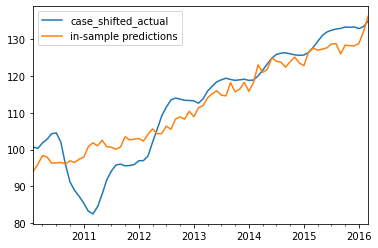

In [57]:
in_sample_results.plot()

<AxesSubplot:>

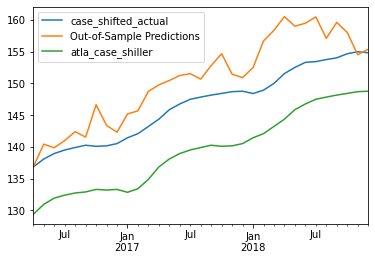

In [58]:
out_of_sample_results.plot()

In [ ]:
# pca analysis
# consider windows, trailing 3 months
# windows possibly with lstm
# random forest, feature importance


# also look at 6 months and 3 months, which out of sample more accurate
# mape, other metric for forecasting (at different offsets), 
# compare out of sample accuracies across MSAs
# XG boost linear regressor, can take a while to train


# insights on the nature of case shiller
# cross msa comparisons

In [59]:
# atla_df_3M = atla_df

atla_df_3M["case_shifted"] = atla_df_3M["atla_case_shiller"].shift(-3)

atla_df_3M.dropna(inplace = True)

# atla_df_6M = atla_df

atla_df_6M["case_shifted"] = atla_df_6M["atla_case_shiller"].shift(-6)

atla_df_6M.dropna(inplace = True)


# atla_df_24M = atla_df

atla_df_24M["case_shifted"] = atla_df_24M["atla_case_shiller"].shift(-24)

atla_df_24M.dropna(inplace = True)




In [60]:
#3M Model

X = atla_df_3M[["atla_unemployment","atla_labor_force","hr_wage_atla","sfr_perm_atl.csv","monthly_econindex_atla","weekly_atla_earnings","Weekly_Hours"]]

y = atla_df_3M[["case_shifted"]]

split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]


X_scaler = scaler.fit(X_train)

X_train = X_scaler.transform(X_train)

X_test = X_scaler.transform(X_test)

model = linear_model.TweedieRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

out_of_sample_results = y_test

out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)


#out of sample performance

out_of_sample_mse = mean_squared_error(
    out_of_sample_results["case_shifted"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

out_of_sample_rmse = np.sqrt(out_of_sample_mse)
r2 = r2_score(out_of_sample_results["case_shifted"], out_of_sample_results["Out-of-Sample Predictions"])
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Out-of-Sample r2: {r2}")

#In sample performance

in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

in_sample_results["in-sample predictions"] = model.predict(X_train)


# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_mse = mean_squared_error(
    in_sample_results["case_shifted"],
    in_sample_results["in-sample predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_rmse = np.sqrt(in_sample_mse)
r2_in = r2_score(in_sample_results["case_shifted"], in_sample_results["in-sample predictions"])
print(f"In Sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In sample r2: {r2_in}")

Out-of-sample Root Mean Squared Error (RMSE): 9.40193798559859
Out-of-Sample r2: -1.3140597043741447
In Sample Root Mean Squared Error (RMSE): 6.482134134609488
In sample r2: 0.7926561379970829


C:\Users\eprie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-60-652f74bb0445>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
<ipython-input-60-652f74bb0445>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_sample_resu

In [61]:
out_of_sample_results = pd.merge(out_of_sample_results, atla_df_3M["atla_case_shiller"], left_index = True, right_index = True) 

out_of_sample_results.head(14)

,case_shifted,Out-of-Sample Predictions,atla_case_shiller
2016-11-01,133.410572,128.856542,133.198967
2016-12-01,134.886099,127.691923,133.294915
2017-01-01,136.837137,131.128060,132.841713
2017-02-01,138.086531,130.633433,133.410572
2017-03-01,138.948608,132.709494,134.886099
2017-04-01,139.503131,133.347393,136.837137
2017-05-01,139.891491,133.793190,138.086531
2017-06-01,140.254127,133.960679,138.948608
2017-07-01,140.084138,133.359449,139.503131
2017-08-01,140.159891,133.747344,139.891491


<AxesSubplot:>

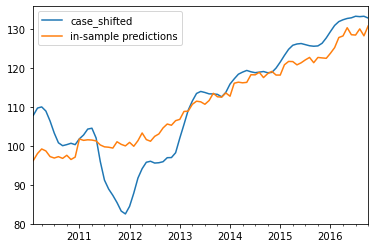

In [62]:
in_sample_results.plot()

<AxesSubplot:>

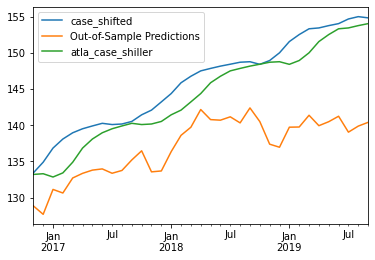

In [64]:
out_of_sample_results.plot()

In [65]:
#6M Model

X = atla_df_6M[["atla_unemployment","atla_labor_force","hr_wage_atla","sfr_perm_atl.csv","monthly_econindex_atla","weekly_atla_earnings","Weekly_Hours"]]

y = atla_df_6M[["case_shifted"]]

split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]


X_scaler = scaler.fit(X_train)

X_train = X_scaler.transform(X_train)

X_test = X_scaler.transform(X_test)

model = linear_model.TweedieRegressor()
model.fit(X_train, y_train)
predictions = model.predict(X_test)

out_of_sample_results = y_test

out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)


#out of sample performance

out_of_sample_mse = mean_squared_error(
    out_of_sample_results["case_shifted"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

out_of_sample_rmse = np.sqrt(out_of_sample_mse)
r2 = r2_score(out_of_sample_results["case_shifted"], out_of_sample_results["Out-of-Sample Predictions"])
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Out-of-Sample r2: {r2}")

#In sample performance

in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

in_sample_results["in-sample predictions"] = model.predict(X_train)


# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_mse = mean_squared_error(
    in_sample_results["case_shifted"],
    in_sample_results["in-sample predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_rmse = np.sqrt(in_sample_mse)
r2_in = r2_score(in_sample_results["case_shifted"], in_sample_results["in-sample predictions"])
print(f"In Sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In sample r2: {r2_in}")

Out-of-sample Root Mean Squared Error (RMSE): 7.263022298573287
Out-of-Sample r2: -0.5240045028635656
In Sample Root Mean Squared Error (RMSE): 6.223370655099742
In sample r2: 0.8188625532514978


C:\Users\eprie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-65-8e47bd138950>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
<ipython-input-65-8e47bd138950>:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_sample_resu

<AxesSubplot:>

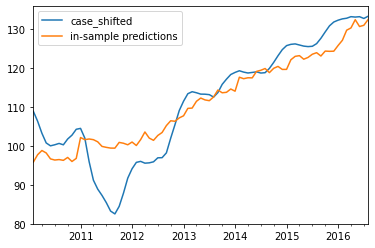

In [66]:
in_sample_results.plot()

<AxesSubplot:>

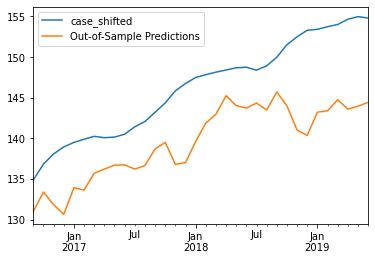

In [67]:
out_of_sample_results.plot()

In [68]:
#24M Model

X = atla_df_24M[["atla_unemployment","atla_labor_force","hr_wage_atla","sfr_perm_atl.csv","monthly_econindex_atla","weekly_atla_earnings","Weekly_Hours"]]

y = atla_df_24M[["case_shifted"]]

split = int(0.7 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]


X_scaler = scaler.fit(X_train)

X_train = X_scaler.transform(X_train)

X_test = X_scaler.transform(X_test)

model = linear_model.TweedieRegressor()

model.fit(X_train, y_train)
predictions = model.predict(X_test)

out_of_sample_results = y_test

out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)


#out of sample performance

out_of_sample_mse = mean_squared_error(
    out_of_sample_results["case_shifted"],
    out_of_sample_results["Out-of-Sample Predictions"]
)

# Using that mean-squared-error, calculate the root-mean-squared error (RMSE):
# YOUR CODE HERE!

out_of_sample_rmse = np.sqrt(out_of_sample_mse)
r2 = r2_score(out_of_sample_results["case_shifted"], out_of_sample_results["Out-of-Sample Predictions"])
print(f"Out-of-sample Root Mean Squared Error (RMSE): {out_of_sample_rmse}")
print(f"Out-of-Sample r2: {r2}")

#In sample performance

in_sample_results = y_train

# Add a column of "in-sample" predictions to that dataframe:  
# YOUR CODE HERE!

in_sample_results["in-sample predictions"] = model.predict(X_train)


# Calculate in-sample mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_mse = mean_squared_error(
    in_sample_results["case_shifted"],
    in_sample_results["in-sample predictions"]
)

# Calculate in-sample root mean_squared_error (for comparison to out-of-sample)
# YOUR CODE HERE!

in_sample_rmse = np.sqrt(in_sample_mse)
r2_in = r2_score(in_sample_results["case_shifted"], in_sample_results["in-sample predictions"])
print(f"In Sample Root Mean Squared Error (RMSE): {in_sample_rmse}")
print(f"In sample r2: {r2_in}")


Out-of-sample Root Mean Squared Error (RMSE): 11.20312521930215
Out-of-Sample r2: -3.9860066801284386
In Sample Root Mean Squared Error (RMSE): 5.535626772382109
In sample r2: 0.8653858056572358


C:\Users\eprie\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)
<ipython-input-68-bcd31608e96a>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  out_of_sample_results["Out-of-Sample Predictions"] = model.predict(X_test)
<ipython-input-68-bcd31608e96a>:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_sample_resu

<AxesSubplot:>

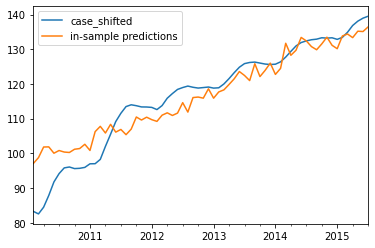

In [69]:
in_sample_results.plot()

<AxesSubplot:>

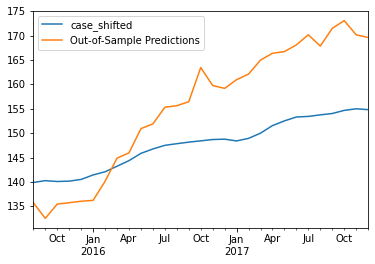

In [70]:
out_of_sample_results.plot()